# Project 2
## least squares regression and nearest neighbor classifiers

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke* Omid Najaee Nezhad

### task 2.1 least squares regression for missing value prediction

Least squares polynomial fit with loss $E(w) = \big\vert\big\vert Xw -y \big\vert\big\vert^2$:

$$
w = \big( X^T X\big)^{-1} X^T y
$$

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots  & x_1^d \\ 
 &  &  & \vdots  & \\ 
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}, \ \ \ \ y = \begin{bmatrix}
y_1 \\
\vdots \\ 
y_n\\ 
\end{bmatrix}
$$

For this task fit models for $d\in \{ 1, 5, 10\}$

d: 1    theta_MLE_unstable: [-209.32503027    1.61805916] 

d: 1    theta_MLE_Stable: [-209.32503027    1.61805916] 

height: 174.000000  predicted weight: 72.217263
height: 174.000000  predicted weight: 72.217263
height: 162.000000  predicted weight: 52.800554
------------------
d: 5    theta_MLE_unstable: [ -1.30479804e+08   3.79331954e+06  -4.40815298e+04   2.55955945e+02
  -7.42582670e-01   8.61160034e-04] 

d: 5    theta_MLE_Stable: [  1.45372183e+02   5.00647315e+03  -1.15279602e+02   9.94127434e-01
  -3.80603245e-03   5.45891060e-06] 

height: 174.000000  predicted weight: 73.906570
height: 174.000000  predicted weight: 73.906570
height: 162.000000  predicted weight: 50.721152
------------------
d: 10    theta_MLE_unstable: [  1.61318571e+07  -3.82794567e+05   2.97487101e+03  -7.90433303e+00
   4.09719587e-02  -6.01323493e-04   2.71326715e-06  -4.21290555e-09
   3.50082681e-11  -2.44267472e-13   4.61527761e-16] 

d: 10    theta_MLE_Stable: [  3.39741649e-19  -5.63814158e-12   4.

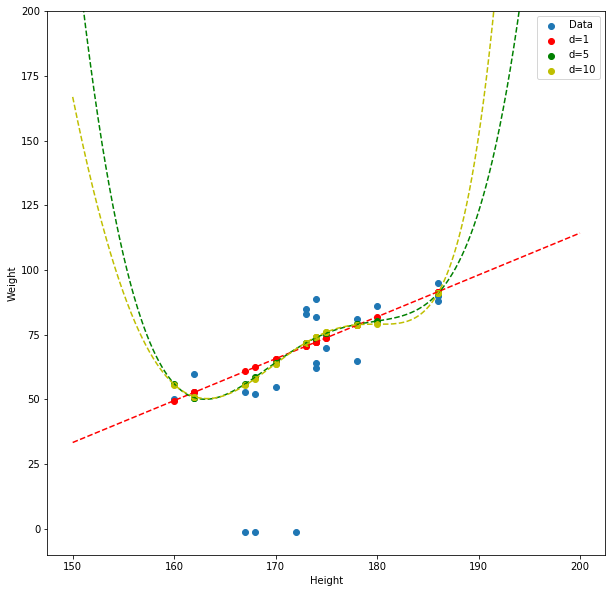

In [2]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import sys



def predict(X_design, theta):
    predictions = np.matmul(X_design,theta)
    return predictions

def leastSquaresUnstable(X_design, Y):
    X_T_X = np.matmul(X_design.T, X_design)
    inverse = np.linalg.inv(X_T_X)
    theta_MLE = np.matmul(np.matmul(inverse, X_design.T), Y)

    return theta_MLE

def leastSquaresStable(X_design, Y):
    theta_MLE = np.matmul(np.linalg.pinv(X_design), Y)

    return theta_MLE

def commputeDesignX(X,d):
    X_design = np.array([[x ** (i) for i in range(d + 1)] for x in X])

    return X_design

# def leastSquares(X_design,Ys):
#
#     X_T_X = np.matmul(np.transpose(X_design), X_design)
#     inverse = np.linalg.inv(X_T_X)
#     theta_MLE = np.matmul(np.matmul(inverse, np.transpose(X_design)), Ys)
#
#     return theta_MLE

dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)
ws = data[:, 0].astype('int32')
hs = data[:, 1].astype('int32')
gs = data[:, 2]

wsAll = np.array(ws, dtype=float)
hsAll = np.array(hs, dtype=float)
gsAll = np.array(gs)

# Remove outliers
wIndex = ((ws > 0) * 1).nonzero()
wIndexOutliers = ((ws < 0) * 1).nonzero()

ws = wsAll[wIndex]
hs = hsAll[wIndex]
gs = gsAll[wIndex]

hsOut = hs[wIndexOutliers]

Ds = [1,5,10]
colors = ['r--','g--','y--']
colorsScatter = ['r', 'g', 'y']
xs = np.linspace(150, 200, 1000)
plt.figure(figsize=(10,10))
plt.scatter(hsAll, wsAll, label='Data')

for i,d in enumerate(Ds):
    X_design = commputeDesignX(X=hs, d=d)
    theta_MLE_unstable = leastSquaresUnstable(X_design=X_design,Y=ws)
    theta_MLE_Stable = leastSquaresStable(X_design=X_design,Y=ws)
    print("d: %d    theta_MLE_unstable: %s \n" % (d, theta_MLE_unstable))
    print("d: %d    theta_MLE_Stable: %s \n" % (d,theta_MLE_Stable))
    # Predictions for outliers
    X_design_Out = commputeDesignX(hsOut,d=d)
    predsOutliers = predict(X_design=X_design_Out, theta=theta_MLE_Stable)
    for j,predO in enumerate(predsOutliers):
        print("height: %f  predicted weight: %f" % (hsOut[j], predsOutliers[j]))
    print('------------------')

    predictions = predict(X_design=X_design, theta=theta_MLE_Stable)
    X_design_xs = commputeDesignX(xs, d=d)
    ys = predict(X_design=X_design_xs, theta=theta_MLE_Stable)

    # Plot
    plt.xlabel('Height')
    plt.ylabel('Weight')
    label = 'd=' + str(d)
    plt.ylim([-10, 200])
    plt.scatter(hs, predictions, color=colorsScatter[i],label=label)
    plt.plot(xs, ys, colors[i])
    plt.legend()

plt.show()


### task 2.2: conditional expectation for missing value prediction

Fit a bi-variate Gaussian to the height and weight data in $x$ and $y$ to model the joint density $p(x,y)$ of heights and weights.

Given your fitted bi-variate Gaussian, use the idea of conditional expectation to predict the weight values for the outliers. That is, let $x_0$ denote the available height data of an outlier and compute 
$$
|\!E \big[ \ y \ \big| \ x_0 \ \big] =
\int y \ p(y | x_0 ) dy
$$

Do this either analytically as discussed in the lecture or numerically and report your results.

In [3]:
import numpy as np 
# Load data
dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)
ws = data[:,0]
hs = data[:,1]
gs = data[:,2]

ws = np.array(ws, dtype=float)
hs = np.array(hs, dtype=float)
gs = np.array(gs)

# Handle outliers
wIndex = ((ws > 0) * 1).nonzero()
wIndexOutliers = ((ws < 0) * 1).nonzero()

hsOut = hs[wIndexOutliers]
ws = ws[wIndex]
hs = hs[wIndex]
gs = gs[wIndex]

# Shape = (#variables,#values)
X = np.array([ws,hs],dtype=float)

# Compute parameters of bivariate Gaussian
meanWeight = np.mean(ws)
meanHeight = np.mean(hs)
sdWeight = np.std(ws)
sdHeight = np.mean(hs)
cov_h_w = np.cov(X)[0,1]
pearsonCor = cov_h_w/(sdHeight*sdWeight)


# Predict weights for outliers
for hOut in hsOut:
    predWeight = meanWeight + pearsonCor*(sdWeight/sdHeight)*(hOut-meanHeight)
    print("height of outlier: %f  predicted weight: %f" % (hOut, predWeight))

height of outlier: 168.000000  predicted weight: 71.507335
height of outlier: 172.000000  predicted weight: 71.519163
height of outlier: 167.000000  predicted weight: 71.504378


### task 2.3: Baysian regression for missing value prediction

Use the method of Baysian regression to fit a 5.th degree polynomial
$$
y(x) = \sum_{j=0}^{5} w_j x^j
$$

to the height and weight data in $x$ and $y$. Assume a Gaussian prior
$$
p(w) \sim \mathcal{N} \big(w \ \big| \ \mu_0, \sigma_0^2 I \ \big)
$$

for the parameter vector $w$ where $\mu_0 = 0$ and $\sigma_0^2=3$. Plot your resulting model and compare it to the corresponding model ($d=5$) from task 2.1

theta_MLE_unstable: [ -1.30479804e+08   3.79331954e+06  -4.40815298e+04   2.55955945e+02
  -7.42582670e-01   8.61160034e-04] 

theta_MLE_Stable: [  1.45372183e+02   5.00647315e+03  -1.15279602e+02   9.94127434e-01
  -3.80603245e-03   5.45891060e-06] 

theta_MAP: [  1.40191443e-04   1.26025474e-02   5.16581410e-01  -9.04147996e-03
   5.27349399e-05  -1.02058518e-07] 

-----------Predictions based on Sigma^2= Variance of residuals-----------
height: 186.000000  predicted weight: 90.641851
height: 170.000000  predicted weight: 64.453283
height: 167.000000  predicted weight: 59.143994
height: 173.000000  predicted weight: 70.396605
height: 186.000000  predicted weight: 90.641851
height: 180.000000  predicted weight: 83.974650
height: 173.000000  predicted weight: 70.396605
height: 168.000000  predicted weight: 60.817209
height: 174.000000  predicted weight: 72.439782
height: 170.000000  predicted weight: 64.453283
height: 186.000000  predicted weight: 90.641851
height: 175.000000  predicte

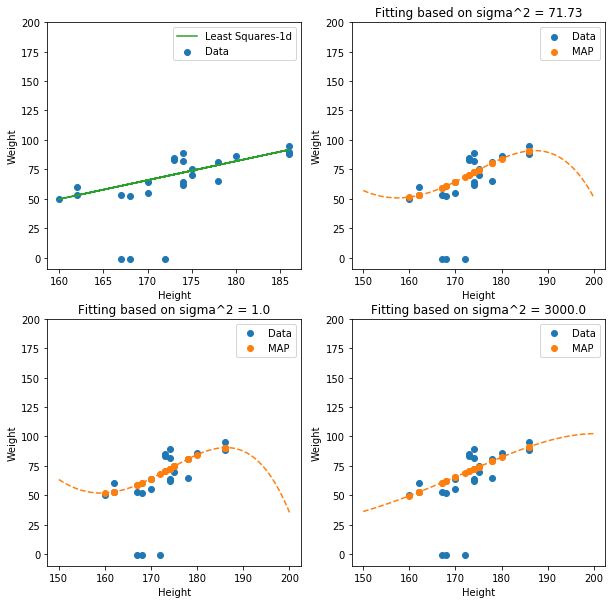

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
def predict(X_design, theta):
    predictions = np.matmul(X_design,theta)
    return predictions

def bayesianRegression(X_design, Y, sigmaSquare, sigma_0_square):
    X_T_X = np.matmul(X_design.T,X_design)
    regulariser = sigmaSquare/sigma_0_square
    I_regularised = regulariser*np.identity(X_T_X.shape[0])
    inverse = np.linalg.inv(np.add(X_T_X,I_regularised))
    theta_MAP = np.matmul(np.matmul(inverse,X_design.T), Y)

    return theta_MAP

def leastSquaresUnstable(X_design, Y):
    X_T_X = np.matmul(X_design.T, X_design)
    inverse = np.linalg.inv(X_T_X)
    theta_MLE = np.matmul(np.matmul(inverse, X_design.T), Y)

    return theta_MLE

def leastSquaresStable(X_design, Y):
    theta_MLE = np.matmul(np.linalg.pinv(X_design), Y)

    return theta_MLE

def commputeDesignX(X,d):
    X_design = np.array([[x ** (i) for i in range(d + 1)] for x in X])

    return X_design

# Load data
dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)

ws = data[:, 0].astype('int32')
hs = data[:, 1].astype('int32')
gs = data[:, 2]

wsAll = np.array(ws, dtype=float)
hsAll = np.array(hs, dtype=float)
gsAll = np.array(gs)


# Remove outliers
wIndex = ((ws > 0) * 1).nonzero()

ws = wsAll[wIndex]
hs = hsAll[wIndex]
gs = gsAll[wIndex]

# Apply Bayessian regression
sigma_0_square = 3.
sigmaSquare = 1.

X_design_hsAll_d_5 = commputeDesignX(X=hsAll, d=5)
X_design = commputeDesignX(X=hs,d=5)
thetaMLE_Unstable = leastSquaresUnstable(X_design=X_design, Y=ws)
thetaMLE_Stable = leastSquaresStable(X_design=X_design, Y=ws)

# Select sigmaSquare
X_design_d_1 = commputeDesignX(X=hs,d=1)
theta_MLE_d_1 = leastSquaresStable(X_design=X_design_d_1,Y=ws)
predictions_d_1 = predict(X_design=X_design_d_1, theta=theta_MLE_d_1)

residuals = predictions_d_1 - ws
varianceResiduals = np.var(residuals)

sigmaSquare = varianceResiduals
SigmaSquare  = [varianceResiduals,1.,3000.]

theta_MAP = bayesianRegression(X_design=X_design, Y=ws, sigmaSquare=sigmaSquare, sigma_0_square=sigma_0_square)
print("theta_MLE_unstable: %s \n" % thetaMLE_Unstable)
print("theta_MLE_Stable: %s \n" % thetaMLE_Stable)
print("theta_MAP: %s \n" % theta_MAP)

predictions = predict(X_design_hsAll_d_5, theta_MAP)

print("-----------Predictions based on Sigma^2= Variance of residuals-----------")
for i,height in enumerate(hsAll):
    print("height: %f  predicted weight: %f" % (height, predictions[i]))

# Plot results
fig, axs = plt.subplots(2,2,figsize=(10, 10))
axs = axs.ravel()
axs[0].set_ylim([-10, 200])

xs = np.linspace(150, 200, 1000)
X_design_xs = commputeDesignX(xs,d=5)

ys = predict(X_design=X_design_xs,theta=theta_MAP)

axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')
axs[0].scatter(hsAll, wsAll, label='Data')

axs[0].plot(hs, predictions_d_1, 'C2',label='Least Squares-1d')
axs[0].legend()

for i,sigmaSquare in enumerate(SigmaSquare):
    currentPlt = i+1
    theta_MAP_current = bayesianRegression(X_design=X_design, Y=ws, sigmaSquare=sigmaSquare, sigma_0_square=sigma_0_square)
    predictions = predict(X_design=X_design_hsAll_d_5,theta=theta_MAP_current)
    axs[currentPlt].set_ylim([-10, 200])
    label = 'MAP'
    axs[currentPlt].set_xlabel('Height')
    axs[currentPlt].set_ylabel('Weight')
    axs[currentPlt].scatter(hsAll, wsAll, label='Data')
    axs[currentPlt].scatter(hsAll, predictions, label=label)
    ys = predict(X_design=X_design_xs, theta=theta_MAP_current)
    axs[currentPlt].plot(xs, ys, 'C1--')
    title = 'Fitting based on sigma^2 = ' + str(round(sigmaSquare,2))
    axs[currentPlt].set_title(title)
    axs[currentPlt].legend()
plt.show()


### task 2.4: Boolean functions and the Boolean Fourier transform

In [5]:
import itertools
from itertools import chain, combinations
import numpy as np


def createFeatureVec(S):
    pSet = powerset(S)
    pSet = [[1] if not list(subSet) else list(subSet) for subSet in pSet]
    featureVec = []

    for subSet in pSet:
        val = 1
        for x in subSet:
            val *= x
        featureVec.append(val)

    return featureVec

'''https://stackoverflow.com/questions/374626/how-can-i-find-all-the-subsets-of-a-set-with-exactly-n-elements'''
def powerset(iterable):
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

def predict(X_design, theta):
    prediction = np.matmul(X_design, theta)
    return prediction


def computeThetaMLE(X_design, Y):
    X_T_X = np.matmul(np.transpose(X_design),X_design)
    inverse = np.linalg.inv(X_T_X)
    pseudoInverse = np.matmul(inverse,np.transpose(X_design))
    theta_MLE = np.matmul(pseudoInverse,Y)
    return theta_MLE

n = 3
tupleList = reversed(list(itertools.product([0, 1], repeat=n)))
X_design = [list(tuple) for tuple in tupleList]
X_design =  np.array([[1. if float(x) == 1 else -1. for x in subList] for subList in X_design])

rule = 110
targetString = np.binary_repr(rule, width=2**3)
Y = np.array([float(x) for x in targetString])

theta_MLE_110 = computeThetaMLE(X_design=X_design,Y=Y)

prediction_110 = predict(X_design,theta_MLE_110)

print( "theta_MLE_110: ", theta_MLE_110)
print( "prediction_110: ", prediction_110)

print("")

rule = 126
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_MLE_126 = computeThetaMLE(X_design=X_design, Y=Y)

prediction_126 = predict(X_design, theta_MLE_126)

print( "theta_MLE_126: ", theta_MLE_126)
print( "prediction_126: ", prediction_126)

print('-------------------------')


# Compute theta based on feature based design matrix
n = 3
S = [i +1 for i in range(n)]
tupleList = reversed(list(itertools.product([0, 1], repeat=n)))
X_design = [list(tuple) for tuple in tupleList]
X_design = np.array([[1. if float(x) == 1 else -1. for x in subList] for subList in X_design])
feature_X_Design = np.array([createFeatureVec(S) for S in X_design])

rule = 110
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_feature_MLE_110 = computeThetaMLE(X_design=feature_X_Design, Y=Y)

prediction_feature_110 = predict(feature_X_Design, theta_feature_MLE_110)

print("theta_feature_MLE_110: ", theta_feature_MLE_110)
print("prediction_feature_110: ", prediction_feature_110)

print("")

rule = 126
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_feature_MLE_126 = computeThetaMLE(X_design=feature_X_Design, Y=Y)

prediction_feature_126 = predict(feature_X_Design, theta_feature_MLE_126)

print( "theta_feature_MLE_126: ", theta_feature_MLE_126)
print( "prediction_feature_126: ", prediction_feature_126)

theta_MLE_110:  [-0.125  0.125  0.125]
prediction_110:  [ 0.125 -0.125 -0.125 -0.375  0.375  0.125  0.125 -0.125]

theta_MLE_126:  [ 0.  0.  0.]
prediction_126:  [ 0.  0.  0.  0.  0.  0.  0.  0.]
-------------------------
theta_feature_MLE_110:  [ 0.625 -0.125  0.125  0.125 -0.125 -0.125 -0.375 -0.125]
prediction_feature_110:  [ 0.  1.  1.  0.  1.  1.  1.  0.]

theta_feature_MLE_126:  [ 0.75  0.    0.    0.   -0.25 -0.25 -0.25  0.  ]
prediction_feature_126:  [ 0.  1.  1.  1.  1.  1.  1.  0.]


### task 2.4.5: nearest neighbor classifier

k: 1  accuracy: 0.885417  runtime: 0.003368
k: 3  accuracy: 0.895833  runtime: 0.004182
k: 5  accuracy: 0.937500  runtime: 0.003507


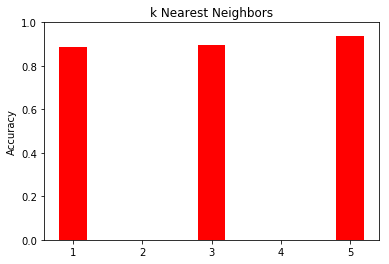

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

'''
https://www.researchgate.net/publication/283568278_NumPy_SciPy_Recipes_for_Data_Science_Computing_Nearest_Neighbors
'''
def k_nearest_neighbors(X, k, x_new):
    argMinSorted = np.argsort(np.sum((X-x_new)**2,axis=1),axis=0)
    return argMinSorted[:k]

trainDataPath = 'data2-train.dat'
testDataPath = 'data2-test.dat'
trainData = np.loadtxt(trainDataPath, dtype=float, delimiter=' ')
testData = np.loadtxt(testDataPath, dtype=float, delimiter=' ')

X = trainData[:, :2]
Y = trainData[:,2]

X_Test = testData[:, :2]
Y_Test = testData[:,2]

K = [1,3,5]
accuracies = []

for k in K:
    start = timeit.default_timer()
    predictions = []
    for x_T in X_Test:
        kNearestNeighbors = k_nearest_neighbors(X, k, x_T)
        predictions.append(1. if np.sum(Y[kNearestNeighbors],axis=0)>0 else -1.)

    accuracy = np.sum(
        np.array([1. if pred == Y_Test[i] else 0. for i, pred in enumerate(predictions)]), axis=0) / float(
        len(Y_Test))
    stop = timeit.default_timer()
    accuracies.append(accuracy)
    print("k: %d  accuracy: %f  runtime: %f" % (k,accuracy,stop - start))

plt.bar(K, accuracies, width=0.4, color='r')
plt.ylabel('Accuracy')
plt.title('k Nearest Neighbors')
plt.ylim(0,1.)
plt.show()

### task 2.5 computing a kD-tree

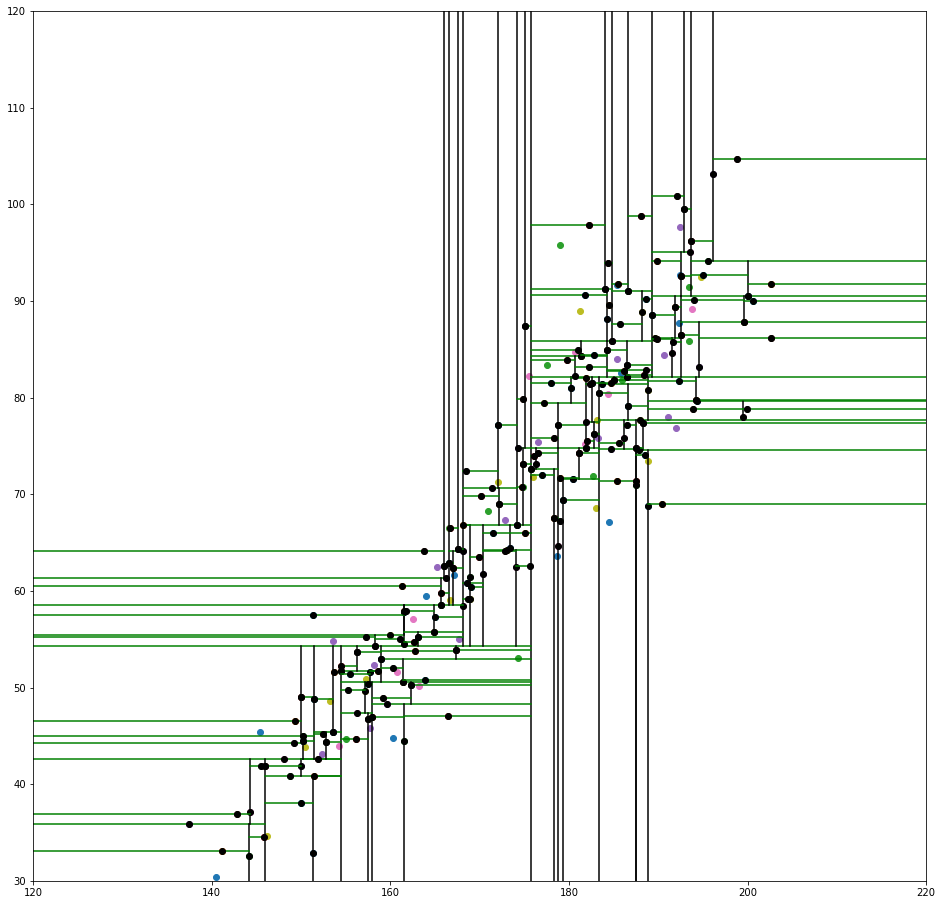

In [7]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from enum import Enum
import os
from numpy.linalg import inv, pinv

np.set_printoptions(precision=1)
points = np.genfromtxt('data2-train.dat',
                  dtype=float,
                  comments='#',
                  delimiter=None)

fig2 = plt.figure(figsize=(16,16))
bx = fig2.add_subplot(111)

class NodeType(Enum):
    LEFT = 0
    RIGHT = 1
class DimensionSelection(Enum):    
    ALTERNATE = 0
    VARIANCE = 1
class SplitType(Enum):
    MIDPOINT = 0
    MEDIAN = 1
    
class Node:
    def __init__(self, point=None, left=None, right=None, depth=None, axis=None, parent=None, nodetype = None):
        self.point = point
        self.left = left
        self.right = right
        self.depth = depth
        self.axis = axis
        self.parent = parent
        self.nodetype = nodetype

def BuildKDTree(node, points, depth, parent, nodetype, dim, sp):
    if(dim == DimensionSelection.ALTERNATE):
        axis = depth % 2
    else:
        axis = 0 if np.var(points, 0)[0] > np.var(points, 0)[1] else 1
    if(sp == SplitType.MEDIAN):
        points = points[points[:,axis].argsort()]
        index = int(math.floor(points.shape[0]/2))
    node = Node(point = points[index], depth=depth, axis = axis, parent = parent, nodetype=nodetype)
    #bx.scatter(node.point[0], node.point[1])
    if(points.size > 3):
        node.left = BuildKDTree(node.left, points[:index], depth=depth+1, parent = node, nodetype=NodeType.LEFT, dim = dim, sp = sp)
        node.right = BuildKDTree(node.right, points[index:], depth=depth+1, parent = node, nodetype=NodeType.RIGHT, dim = dim, sp = sp)
        return node
    else:
        bx.scatter(node.point[0], node.point[1])
        return None
    
root = Node()      
root = BuildKDTree(root, points, depth = 0, parent = None, nodetype = None, 
                   dim = DimensionSelection.ALTERNATE, sp = SplitType.MEDIAN)

bx.set_xlim((120, 220))
bx.set_ylim((30, 120))

def ReverseAxis(axis):
    return math.fabs(axis - 1)

def SearchParent(node, axis): #search the parent (nth parent) with different axis
    search = node
    while search.parent != None:
        if search.parent.axis == axis:
            return search.parent
        else:
            search = search.parent
    
def PlotKDTree(node, parent, lx, hx, ly, hy, ax):
    #if node.depth > 3:
        #return
    diffparent = SearchParent(node, ReverseAxis(node.axis))
    if node.axis == 0:
        if node.nodetype != None and diffparent != None:
            if node.nodetype == NodeType.LEFT:
                hy = diffparent.point[1]
            else:
                ly = diffparent.point[1]
        plt.plot([node.point[0], node.point[0]], [ly, hy], color='black')
    else:
        if node.nodetype != None and diffparent != None:
            if node.nodetype == NodeType.LEFT:
                hx = diffparent.point[0]
            else:
                lx = diffparent.point[0]
            #if(diffparent.parent != None):
                #lx = diffparent.parent.point[0]
        plt.plot([lx, hx], [node.point[1], node.point[1]], color='green')
    
    plt.plot(node.point[0], node.point[1], 'ko')

    if node.left != None:
        PlotKDTree(node = node.left, parent = node, lx = lx, hx = hx, ly = ly, hy = hy, ax = ax)
    if node.right != None:
        PlotKDTree(node = node.right, parent = node, lx = lx, hx = hx, ly = ly, hy = hy, ax = ax)
    
PlotKDTree(root, None, 0, 220, 0, 120, bx)
#3,5
plt.show()